<a href="https://colab.research.google.com/github/haripriyanka2002/mini-project-/blob/main/MINI%20project%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

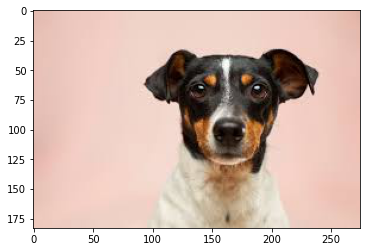

In [318]:
#preprocessing 
import os
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize 

target=[]
images=[]
flat_data=[]

DATADIR = '/content/drive/MyDrive/IMAGES'
CATEGORIES=['cats','dogs']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category) #label encoding the values
  path=os.path.join(DATADIR,category) #create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    plt.imshow(img_array)
    break


In [319]:
#preprocessing 
import os
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize 

target=[]
images=[]
flat_data=[]

DATADIR = '/content/drive/MyDrive/IMAGES'
CATEGORIES=['cats','dogs']

for category in CATEGORIES:
  class_num=CATEGORIES.index(category) #label encoding the values
  path=os.path.join(DATADIR,category) #create path to use all the images
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    #break
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data =np.array(flat_data)
target= np.array(target)
images=np.array(images)

    


In [320]:
len(flat_data[0])

67500

In [321]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

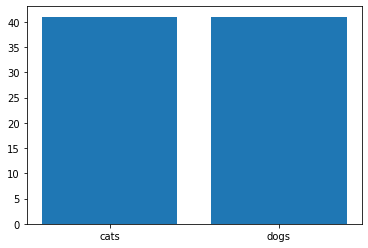

In [322]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)



In [335]:
#spliting training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=99)

In [336]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid =[
             {'C': [1,10,100,1000],'kernel': ['linear']},
             {'C': [1,10,100,1000],'gamma': [0.1,0.01,0.2],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.2],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [337]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [338]:
y_test


array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [333]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [339]:
accuracy_score(y_pred,y_test)

0.7058823529411765

In [340]:
confusion_matrix(y_pred,y_test)

array([[6, 4],
       [1, 6]])

In [341]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.86      0.60      0.71        10\n           1       0.60      0.86      0.71         7\n\n    accuracy                           0.71        17\n   macro avg       0.73      0.73      0.71        17\nweighted avg       0.75      0.71      0.71        17\n'

In [308]:
import pickle
pickle.dump(clf,open("img_model.p",'wb'))

In [309]:
model=pickle.load(open('img_model.p','rb'))

enter the urlhttps://static01.nyt.com/images/2019/06/17/science/17DOGS/17DOGS-superJumbo.jpg
(1365, 2048, 3)
PREDCIDED OUTPUT: dogs


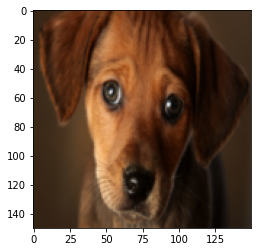

In [343]:
#testing a brand new image
flat_data= []
url = input('enter the url')
img=imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDCIDED OUTPUT: {y_out}')